Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

Loading datasets

In [2]:
df=pd.read_csv('BoFA.csv')

In [3]:
df

,Applicant_ID,Full_Name,Age,Gender,Employment_Status,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Loan_Purpose,...,Loan_Type,Employment_Sector,Co_Applicant,Residency_Status,Loan_Purpose_Type,Loan_Status,Expected_Interest_Rate,Savings_Balance,Bank_Relationship_Years,Employment_Stability_Years
0,3d08e81e-f6ed-48fd-81a6-00f6a3788f81,Michael Werner,18,Female,Unemployed,183820,401,49401,84,Debt Consolidation,...,Refinance,Technology,No,Citizen,Mortgage,Rejected,6.69,74641.94,1,0
1,7f9211f9-d64c-490e-b141-3da3b1fc91da,David Smith,22,Other,Self-Employed,46006,348,223705,84,Auto Loan,...,Refinance,Finance,No,Student Visa,Auto Loan,Rejected,7.22,8309.74,4,10
2,bc7afabc-9888-40b1-ae2d-9aaf2ea0eb67,Kyle Cuevas,72,Other,Self-Employed,165812,623,339050,24,Education Loan,...,Refinance,Finance,No,Permanent Resident,Mortgage,Rejected,3.97,53572.79,6,11
3,88e4a0fe-68dd-420b-b0cc-2cc75711cb3e,Kathleen Allen,39,Other,Self-Employed,115123,778,471913,60,Home Purchase,...,First Loan,Other,No,Permanent Resident,Medical Loan,Rejected,2.72,12204.06,18,4
4,c8d51a59-6251-4970-afe0-4beed407990c,Tara Munoz,31,Female,Self-Employed,168963,599,83818,48,Home Purchase,...,First Loan,Healthcare,Yes,Permanent Resident,Personal Loan,Rejected,4.41,46716.12,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,bb622eaa-798f-4fe3-bd08-78e06114d02e,Matthew Osborne,39,Other,Retired,126328,332,339338,72,Business Loan,...,Refinance,Education,No,Citizen,Mortgage,Rejected,7.28,61740.11,16,0
49996,85decc9c-b1eb-41e3-bbdc-156a9e98aae4,Tracy Mendoza,63,Other,Self-Employed,90438,627,305298,60,Home Purchase,...,Refinance,Education,Yes,Permanent Resident,Education Loan,Rejected,4.23,24455.84,9,4
49997,04811bea-383b-48a6-85f4-393dfa0c87e8,Michael Flores,25,Male,Student,48819,483,24627,24,Auto Loan,...,Refinance,Healthcare,No,Student Visa,Small Business Loan,Rejected,5.37,23431.54,7,0
49998,5707e648-a164-489f-8e71-6cf869a2f98a,Randall Rodriguez,23,Male,Student,83262,392,383803,36,Auto Loan,...,Refinance,Other,No,Permanent Resident,Personal Loan,Rejected,6.38,10286.60,2,0


Data Pre-Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant_ID                50000 non-null  object 
 1   Full_Name                   50000 non-null  object 
 2   Age                         50000 non-null  int64  
 3   Gender                      50000 non-null  object 
 4   Employment_Status           50000 non-null  object 
 5   Annual_Income               50000 non-null  int64  
 6   Credit_Score                50000 non-null  int64  
 7   Loan_Amount                 50000 non-null  int64  
 8   Loan_Term                   50000 non-null  int64  
 9   Loan_Purpose                50000 non-null  object 
 10  Property_Type               50000 non-null  object 
 11  Marital_Status              50000 non-null  object 
 12  Dependents                  50000 non-null  int64  
 13  Debt_to_Income_Ratio        500

In [5]:
df.drop(columns=["Applicant_ID", "Full_Name"], inplace=True)

In [6]:
import pandas as pd

def show_categorical_counts(df):
    """Displays the value counts for all categorical columns in the DataFrame."""
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_columns:
        print(f"\nValue Counts for '{col}':")
        print(df[col].value_counts())
        print("-" * 40)  # Separator for better readability

show_categorical_counts(df)


Value Counts for 'Gender':
Gender
Male      16832
Female    16584
Other     16584
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Employment_Status':
Employment_Status
Employed         10078
Unemployed       10072
Self-Employed     9986
Student           9945
Retired           9919
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Loan_Purpose':
Loan_Purpose
Home Purchase         10173
Business Loan         10070
Debt Consolidation     9986
Auto Loan              9950
Education Loan         9821
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Property_Type':
Property_Type
Townhouse        10088
Multi-Family     10072
Apartment        10052
Single Family     9964
Condo             9824
Name: count, dtype: int64
----------------------------------------

Value Counts for 'Marital_Status':
Marital_Status
Divorced    12667
Widowed     12559
Single      12403
Married     12371
Nam

In [7]:
df.drop(columns=["Loan_Purpose"], inplace=True) #Dataset had another similar feature

In [8]:
#Encoding features

label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    if col != "Loan_Status":  # Exclude target variable
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
df["Loan_Status"] = target_encoder.fit_transform(df["Loan_Status"])
target_names = target_encoder.classes_.astype(str)  # Convert class labels to strings


Exploratory Data Analysis (EDA)

In [9]:
# Set Seaborn style
sns.set_style("whitegrid")

# Detect categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

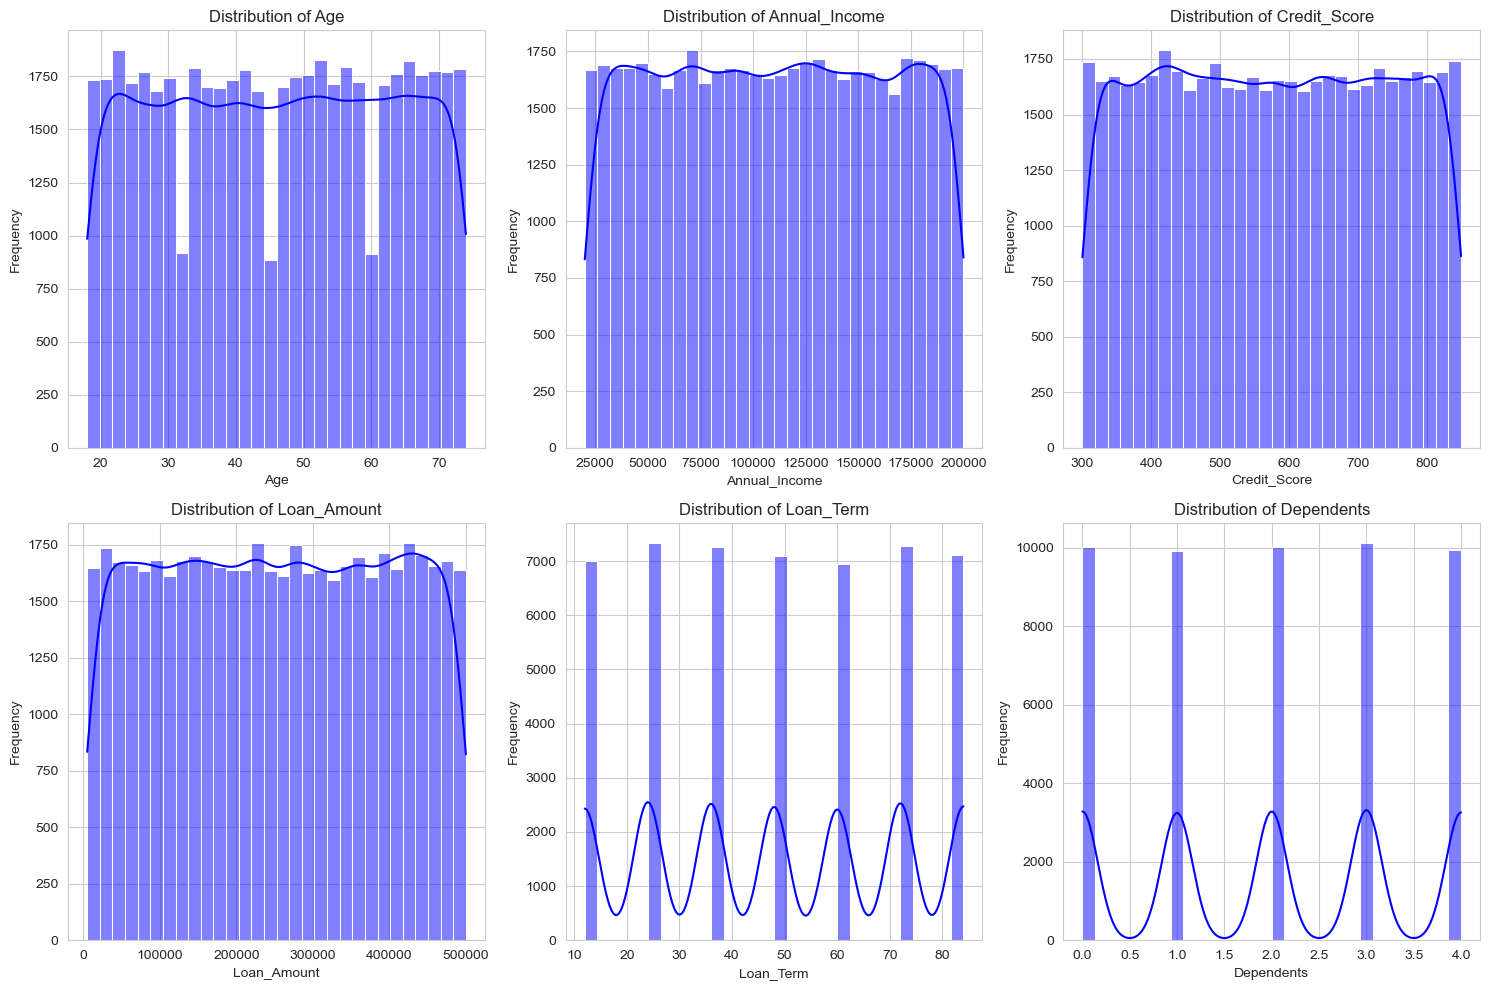

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):  # Limit to first 6 numerical columns
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
#Inference: The distributions suggest that Logistic Regression can generalize well. Most features exhibit uniform or structured distributions without extreme skewness or heavy-tailed patterns. Loan Term and Dependents show distinct peaks, indicating categorical separability, which aids linear classification. The absence of excessive outliers reduces the risk of overfitting. If feature relationships confirm linear separability, Logistic Regression should perform effectively.

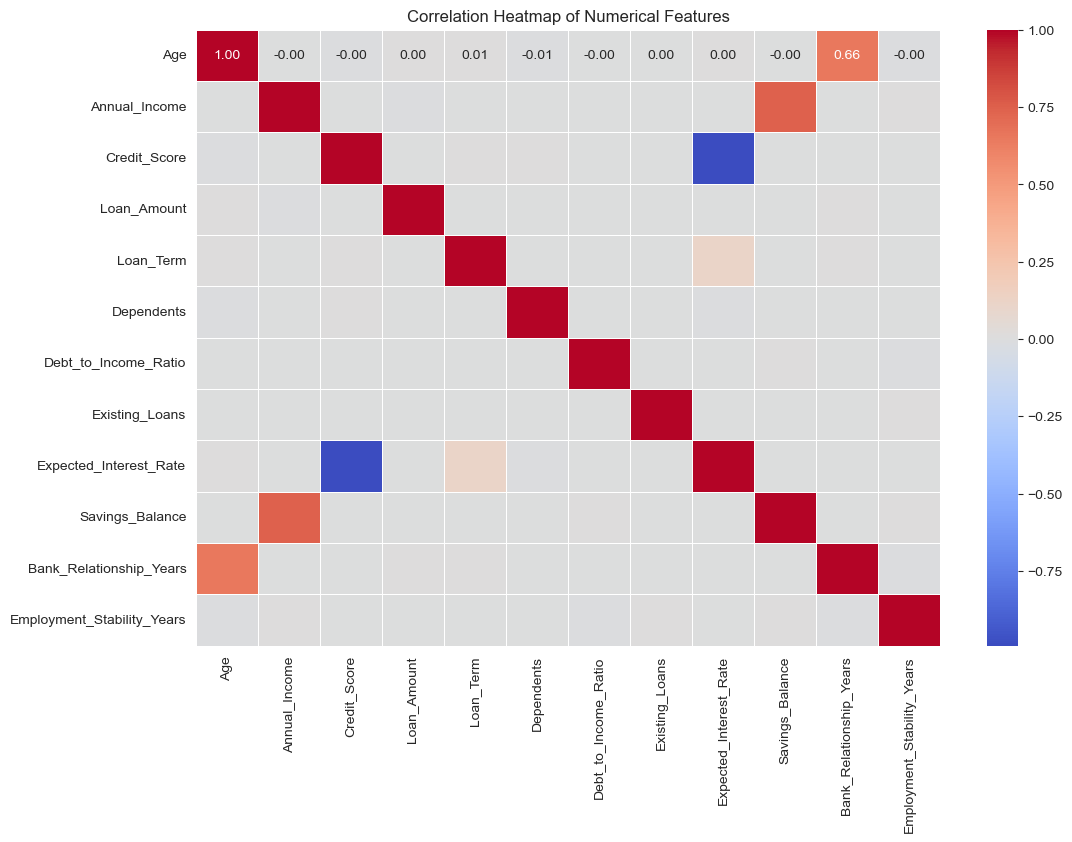

In [12]:
plt.figure(figsize=(12, 8))
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [13]:
#Inference: The heatmap shows minimal multicollinearity, with most features having weak correlations, except for a moderate positive correlation (0.66) between Savings Balance and Bank Relationship Years, indicating that Logistic Regression can perform well without redundant predictors.

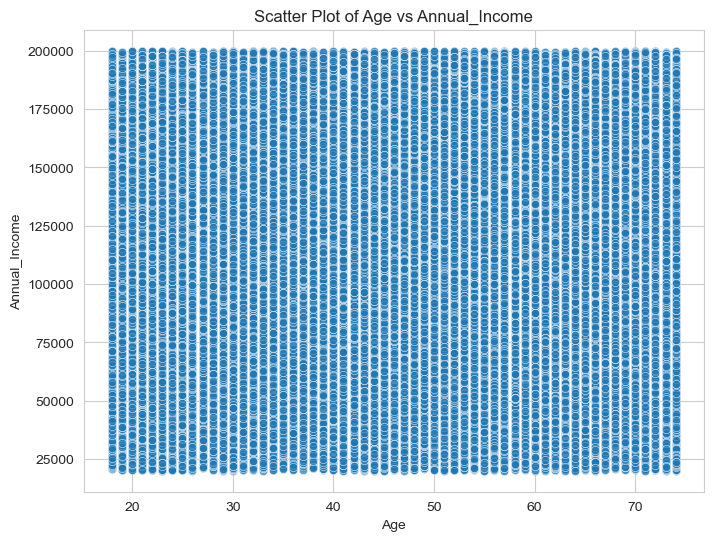

In [14]:
#Scatter Plot: Age V/S Annual Income

if len(numerical_columns) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[numerical_columns[0]], y=df[numerical_columns[1]], alpha=0.7)
    plt.title(f"Scatter Plot of {numerical_columns[0]} vs {numerical_columns[1]}")
    plt.xlabel(numerical_columns[0])
    plt.ylabel(numerical_columns[1])
    plt.show()

In [15]:
#Inference: The scatter plot of Age vs. Annual_Income shows a uniform distribution of income across different age groups. There is no clear trend or correlation, suggesting that income is evenly spread across all ages in the dataset, rather than increasing or decreasing with age.

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

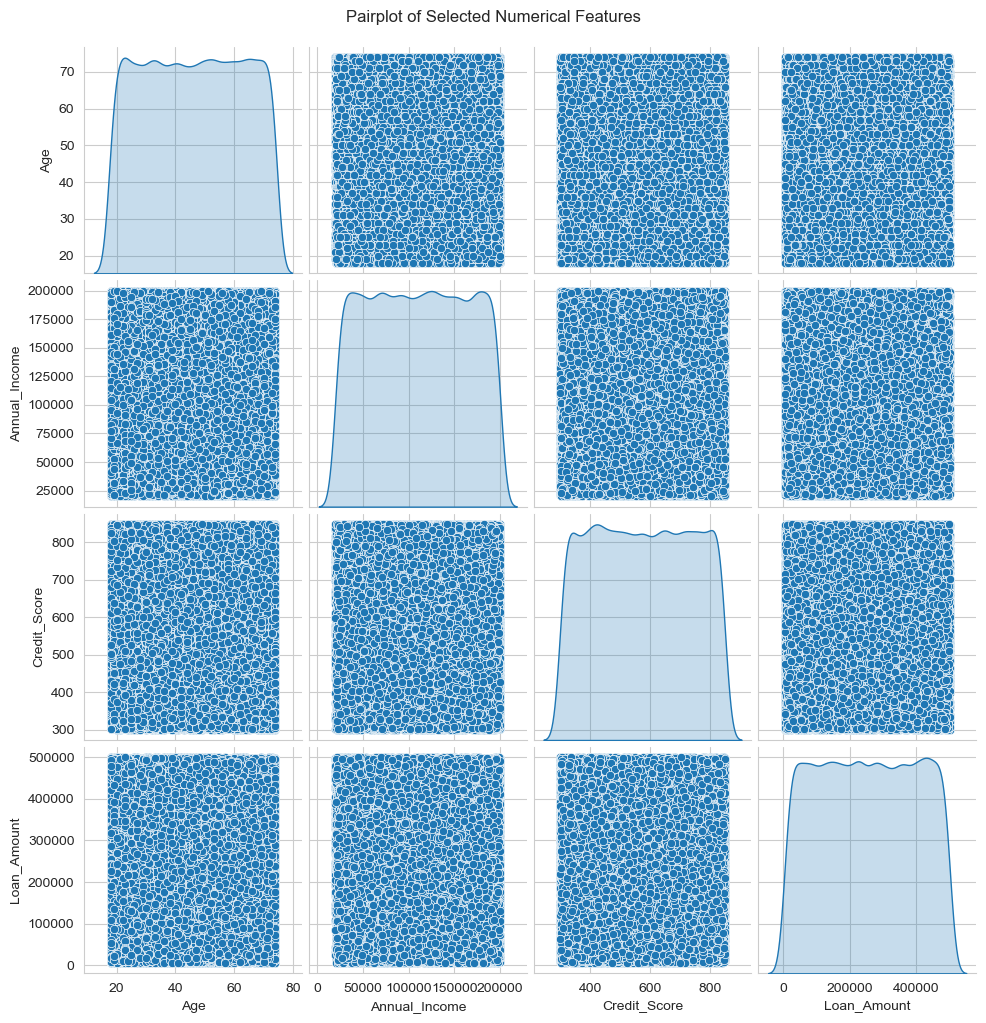

In [16]:
#Pair Plots

if len(numerical_columns) > 1:
    sample_cols = numerical_columns[:4]  # Select up to 4 numerical columns to avoid issues
    sns.pairplot(df[sample_cols], diag_kind="kde")
    plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
    plt.show()

In [17]:
#Inference: The pairplot shows no strong correlations among the variables, with values evenly distributed across their ranges.

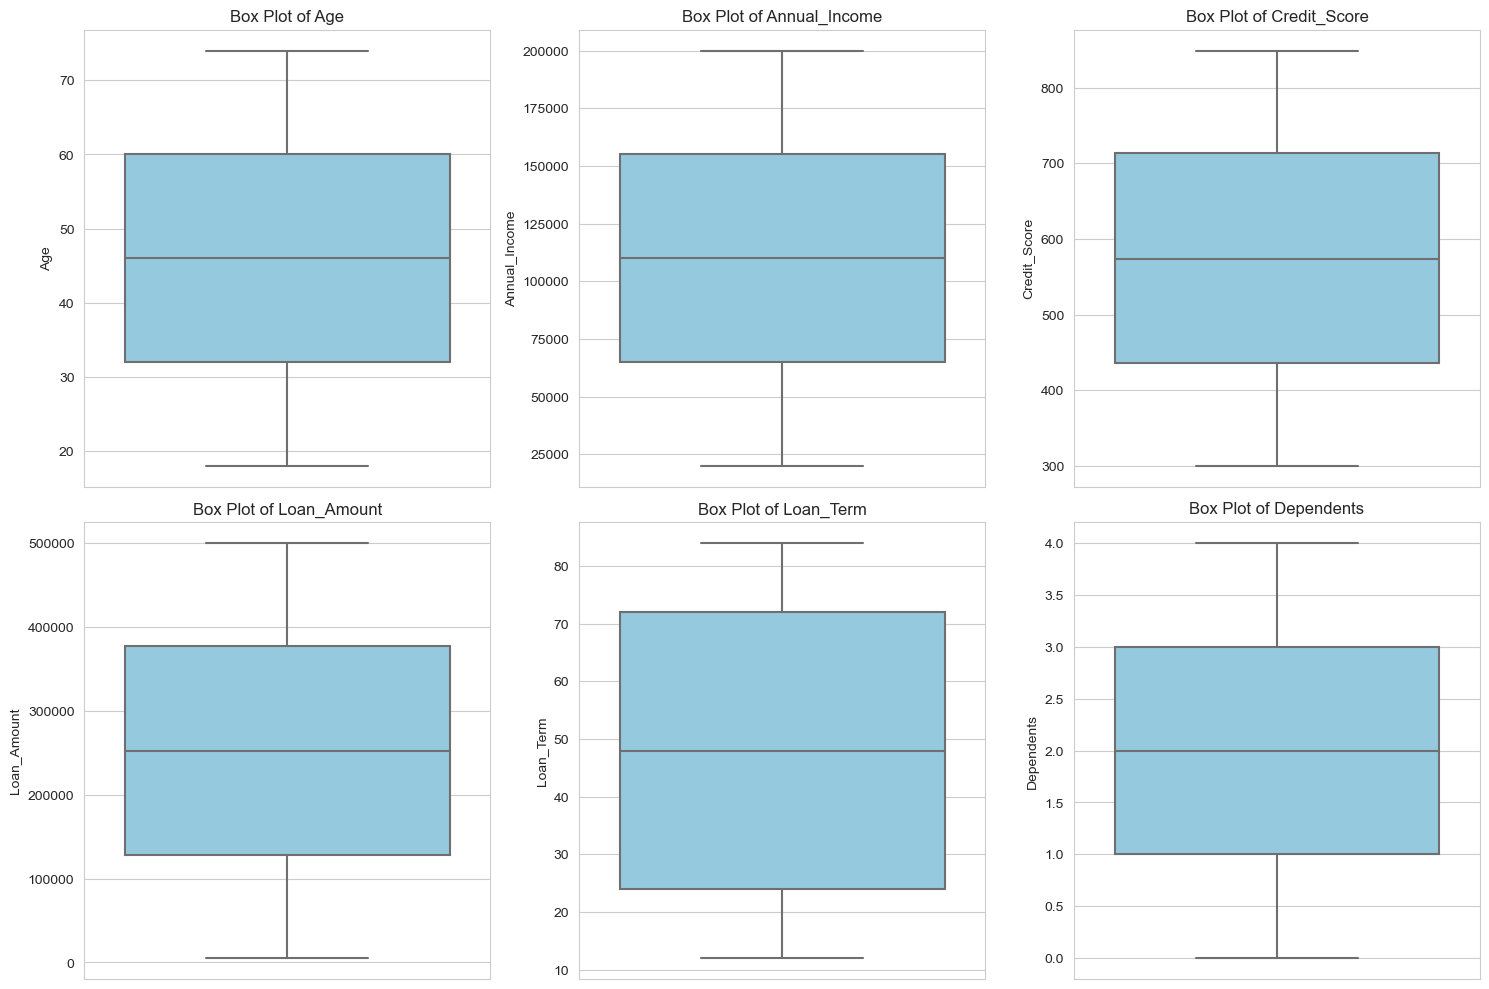

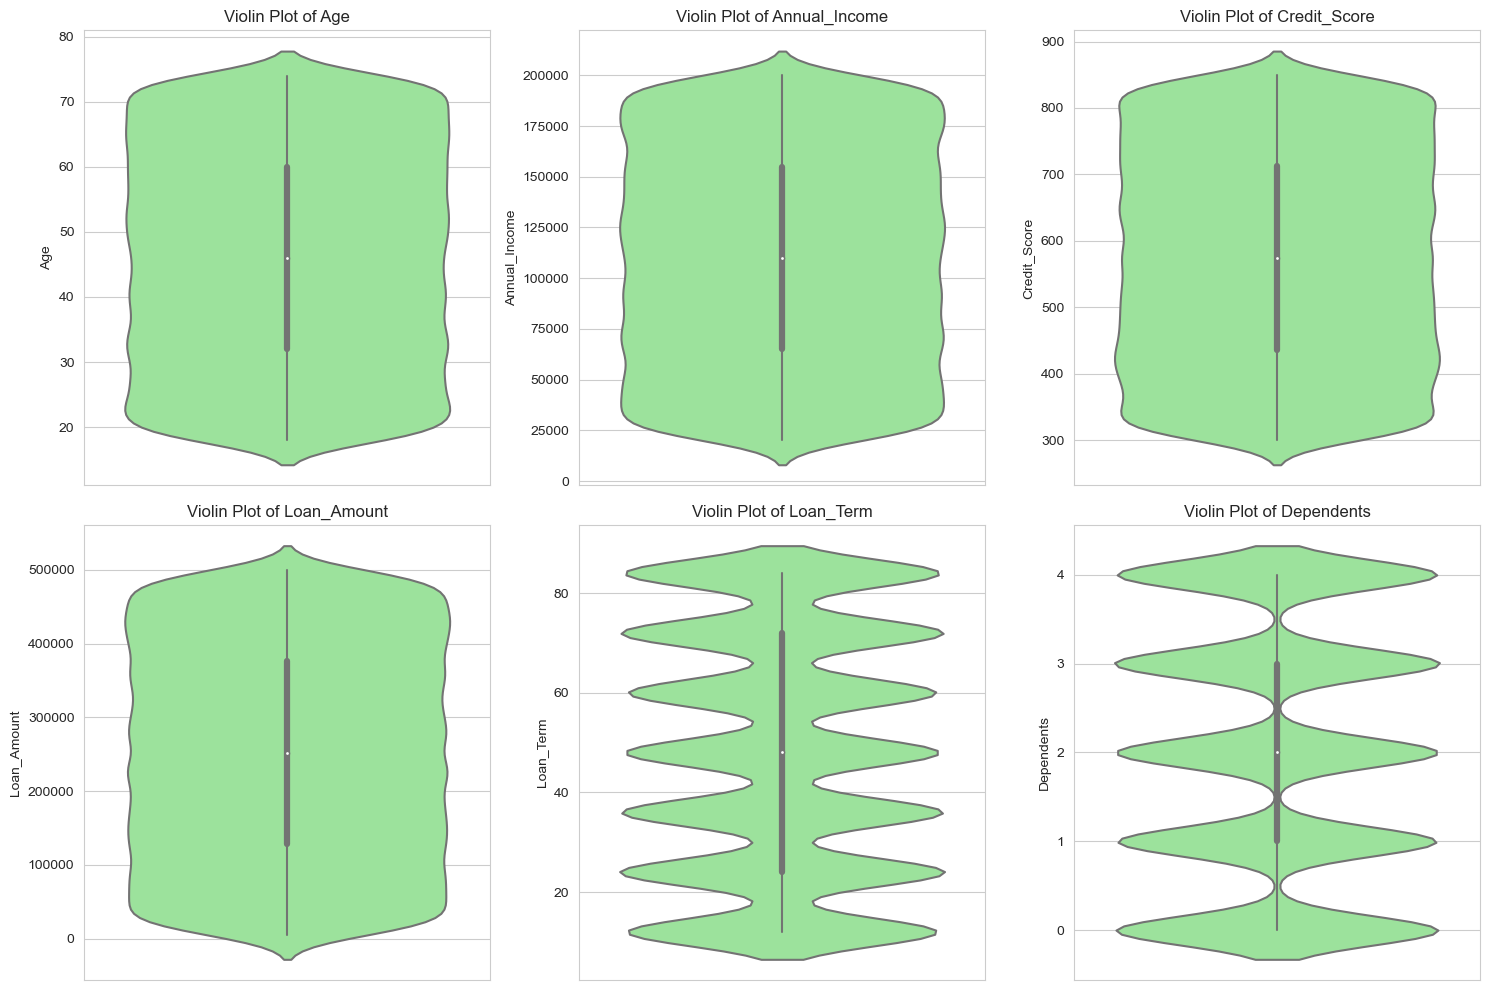

In [18]:
# Box and Whisker Plot (Outlier Detection)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):  # Limit to first 6 numerical columns
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Violin Plot (Distribution and Density)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6]):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(y=df[col], color='lightgreen')
    plt.title(f'Violin Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [19]:
#Inference: The box plots show balanced distributions with no extreme outliers, while the violin plots indicate uniform spread across most variables.

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

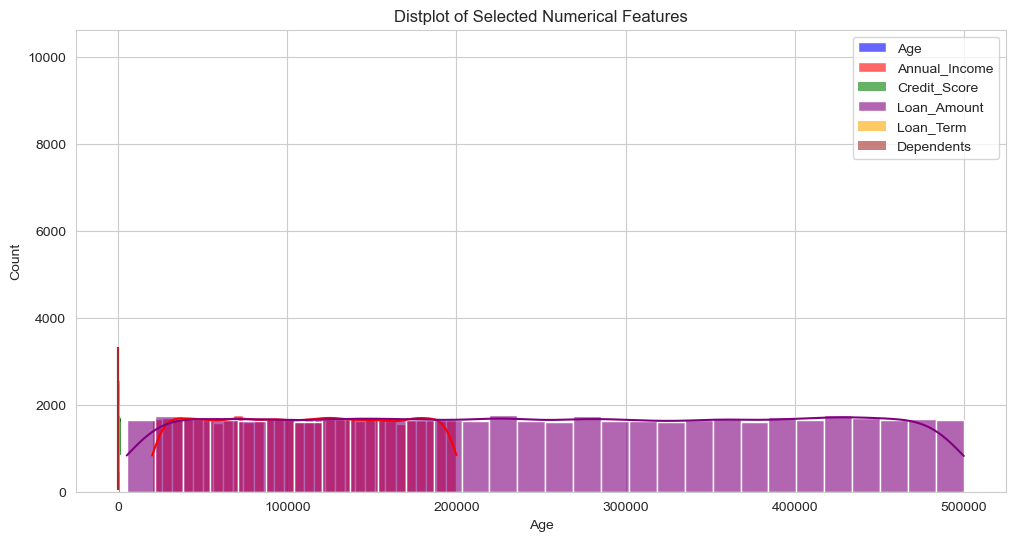

In [20]:
# Distplot (Feature Distribution) with one color per feature
plt.figure(figsize=(12, 6))
colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']  # Define distinct colors

for i, col in enumerate(numerical_columns[:6]):
    sns.histplot(df[col], kde=True, bins=30, alpha=0.6, label=col, color=colors[i])

plt.title("Distplot of Selected Numerical Features")
plt.legend()
plt.show()

In [21]:
#Inference: The distribution plot shows Loan Amount (purple) as the most spread-out feature, while other features have more concentrated distributions, indicating varying scales across numerical attributes.

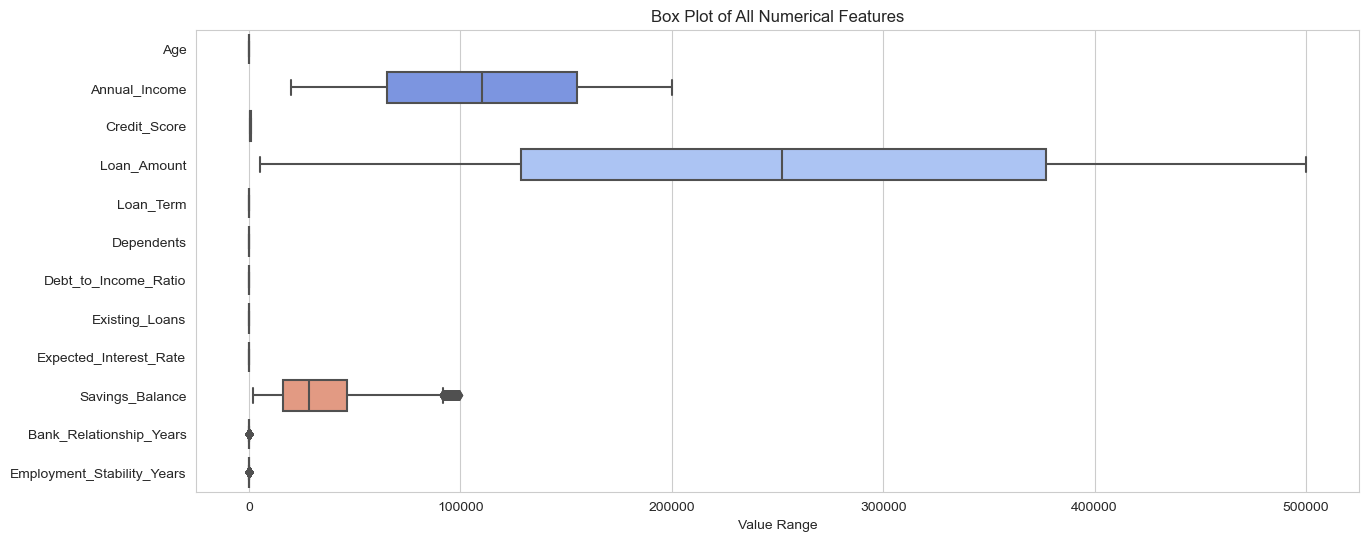

C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shari\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

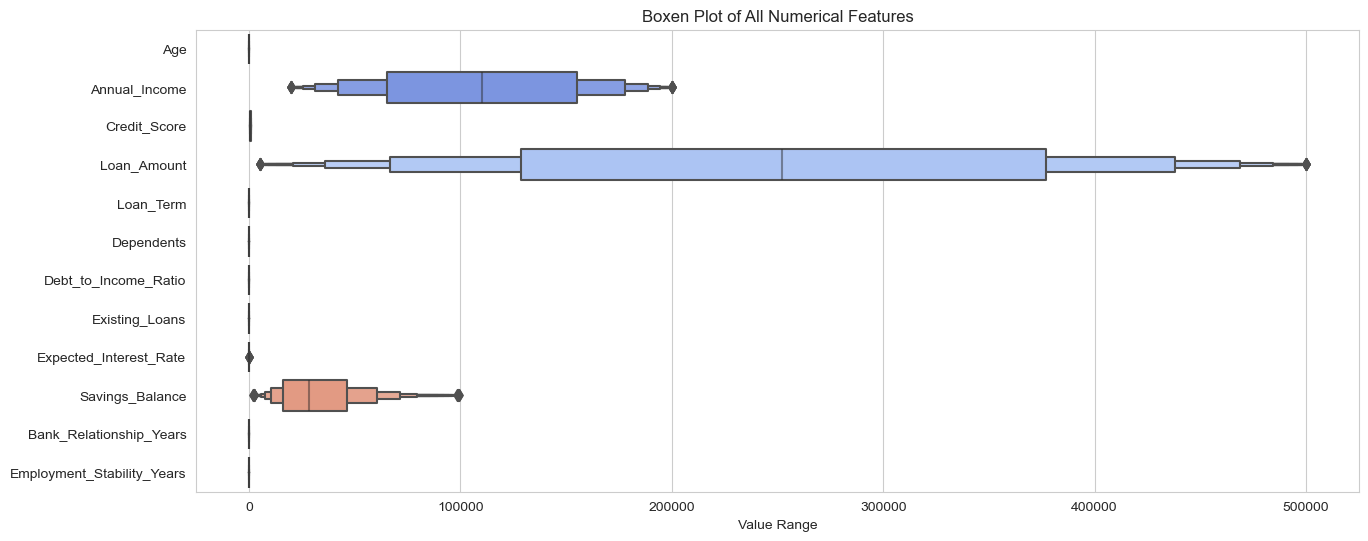

In [22]:
# --------------------------- #
# Outlier Detection
# --------------------------- #
plt.figure(figsize=(15, len(numerical_columns) * 0.5))
sns.boxplot(data=df[numerical_columns], orient="h", palette="coolwarm")
plt.title("Box Plot of All Numerical Features")
plt.xlabel("Value Range")
plt.show()

plt.figure(figsize=(15, len(numerical_columns) * 0.5))
sns.boxenplot(data=df[numerical_columns], orient="h", palette="coolwarm")
plt.title("Boxen Plot of All Numerical Features")
plt.xlabel("Value Range")
plt.show()

In [23]:
#Inference: The box plot shows Loan Amount and Annual Income have the largest spread, while Savings Balance and Relationship Years have some outliers, indicating variability in customer financial behaviors. The boxen plot highlights Loan Amount and Annual Income as having the widest spread, with Savings Balance and Expected Interest Rate showing some outliers, indicating skewed distributions.

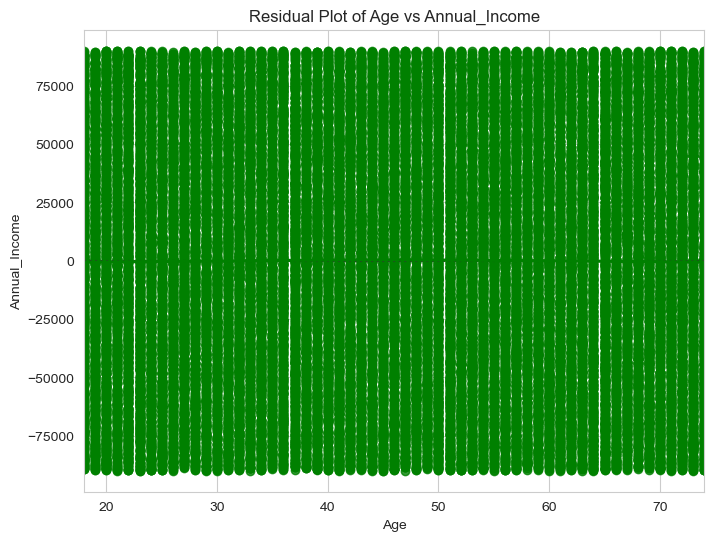

In [24]:
# --------------------------- #
# Residual Analysis for Logistic Regression
# --------------------------- #
if len(numerical_columns) > 1:
    plt.figure(figsize=(8, 6))
    sns.residplot(x=df[numerical_columns[0]], y=df[numerical_columns[1]], lowess=True, color='green')
    plt.title(f'Residual Plot of {numerical_columns[0]} vs {numerical_columns[1]}')
    plt.xlabel(numerical_columns[0])
    plt.ylabel(numerical_columns[1])
    plt.show()

In [25]:
#Inference: The residual plot shows no clear pattern, indicating that Age and Annual Income have little to no linear relationship. The uniform spread suggests that errors are randomly distributed.

Model Training and Testing

In [26]:
# Split dataset into features and target variable
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

In [27]:
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

Evaluvation and Analysis

In [29]:
# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Dictionary to store results
results = {}

print("Training Logistic Regression...")
log_reg.fit(X_train, y_train)  # Train only Logistic Regression
y_pred = log_reg.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=target_names)

# Store results
results["Logistic Regression"] = {
    "Accuracy": accuracy,
    "Classification Report": classification_rep
}

# Display results
print(f"\nModel: Logistic Regression")
print(f"Accuracy: {results['Logistic Regression']['Accuracy']:.4f}")
print("Classification Report:\n", results["Logistic Regression"]["Classification Report"])


Training Logistic Regression...

Model: Logistic Regression
Accuracy: 0.9414
Classification Report:
               precision    recall  f1-score   support

    Approved       0.79      0.75      0.77      1315
    Rejected       0.96      0.97      0.97      8685

    accuracy                           0.94     10000
   macro avg       0.88      0.86      0.87     10000
weighted avg       0.94      0.94      0.94     10000



In [31]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split

# Load dataset (replace with actual dataset)
# X, y = load_your_data()  # Replace this with actual data loading

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance (compute scale_pos_weight)
approved_count = np.sum(y_train == 1)  # Assuming 1 = "Approved"
rejected_count = np.sum(y_train == 0)  # Assuming 0 = "Rejected"
scale_pos_weight = rejected_count / approved_count  # Balance ratio

# Initialize and train XGBoost model
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,  # Handle class imbalance
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

print("Training XGBoost model...")
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probability for "Approved" class

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=["Rejected", "Approved"])

# Print results
print("\nModel: XGBoost")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Training XGBoost model...


C:\Users\shari\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.9987
Classification Report:
               precision    recall  f1-score   support

    Rejected       0.99      1.00      1.00      1315
    Approved       1.00      1.00      1.00      8685

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [ ]:
#XGBoost performs well, but this can be a result of overfitting.

In [35]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring="accuracy")

print(f"Cross-Validation Accuracy Scores: {xgb_cv_scores}")
print(f"Mean CV Accuracy: {xgb_cv_scores.mean():.4f}")

C:\Users\shari\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shari\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shari\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\shari\anaconda3\Lib\site-packages\

Cross-Validation Accuracy Scores: [0.998625 0.999125 0.999625 0.999625 0.999375]
Mean CV Accuracy: 0.9993


In [ ]:
#The cross-validation test proved that the model can be generalized since the test accuracy is almost equal to validation accuracy.

In [30]:
#Even though, Logistic regression performs well, XGBoost performs better and can be generalized.

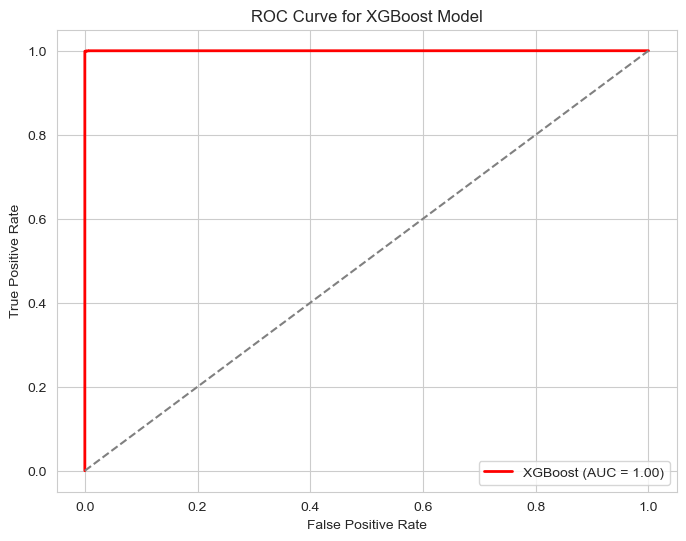

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (Approved) using XGBoost
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color="red", lw=2, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Model")
plt.legend(loc="lower right")
plt.show()

Conclusion

In [ ]:
#XGBoost performs and generalizes well.